# Bump functions
Construct bump functions from step functions (themselves constructed from activation functions, see other dedicated notebook).

Note: we use `PyTorch`'s buil-in functions since we do not invoke functionalities of their `torch.nn.modules` counterparts.

---
tags: pytorch, tutorial, bump functions, activation functions, step functions, visualization, spines

# Imports

In [1]:
import torch
import matplotlib.pyplot as plt

%matplotlib inline

# Smooth bump functions with sigmoids
A bump function is construct as
$$ y = \sigma(b_1 + m_1x) - \sigma(b_2 + m_2x)$$
where $\sigma$ is the sigmoid function.  The location of the upward and downward fronts are $-m_1/b_1$ and $-m_2/b_2$ respectively.  It is a positive bump function if $-m_1/b_1 < -m_2/b_2$ and a negative bump function otherwise.  The bump is not symmetric unless $m_1 = m_2$.

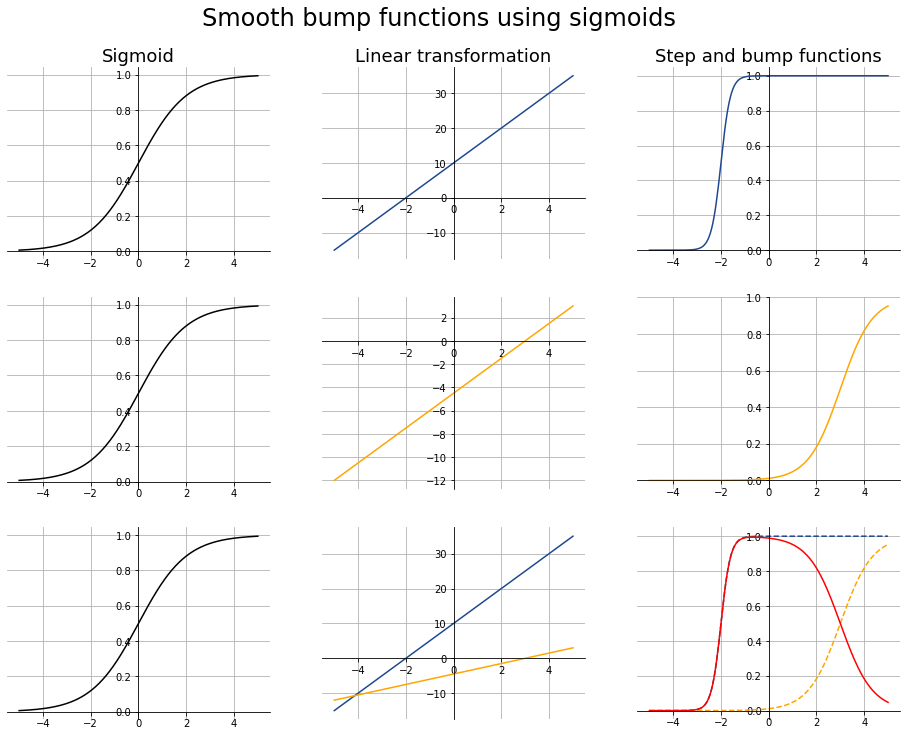

In [2]:
sigmoid = torch.sigmoid

xmin = -5
xmax = 5
k = 20
x = torch.linspace(xmin, xmax, (xmax - xmin)*k + 1).view(-1, 1)

m1 = 5.
s1 = -2.
b1 = -m1*s1
y1 = b1 + m1*x
front_up = sigmoid(y1)

m2 = 1.5
s2 = 3.
b2 = -m2*s2
y2 = b2 + m2*x
front_down = sigmoid(y2)

bump = front_up - front_down

# VISUALIZATION
fig, axs = plt.subplots(3, 3, figsize=(16, 12))

color = 'xkcd:cobalt'
ax = axs[0, 0]
ax.plot(x, sigmoid(x), color='k');
ax.set_title("Sigmoid", fontsize=18);

ax = axs[0, 1]
ax.plot(x, y1, color=color);
ax.set_title("Linear transformation", fontsize=18)

ax = axs[0, 2]
ax.plot(x, front_up, color=color);
ax.set_title("Step and bump functions", fontsize=18)

color = 'Orange'
ax = axs[1, 0]
ax.plot(x, sigmoid(x), color='k');

ax = axs[1, 1]
ax.plot(x, y2, color=color);

ax = axs[1, 2]
ax.plot(x, front_down, color=color);


ax = axs[2, 0]
ax.plot(x, sigmoid(x), color='k');

ax = axs[2, 1]
ax.plot(x, y1, color='xkcd:cobalt');
ax.plot(x, y2, color='Orange');

ax = axs[2, 2]
ax.plot(x, front_up, color='xkcd:cobalt', linestyle='--')
ax.plot(x, front_down, color='Orange', linestyle='--')
ax.plot(x, bump, color='Red')

for ax in axs.flatten():
    ax.spines['bottom'].set_position('zero')    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.grid();

fig.suptitle("Smooth bump functions using sigmoids", fontsize=24, y=.95);

# Piecewise linear bump functions with ReLU

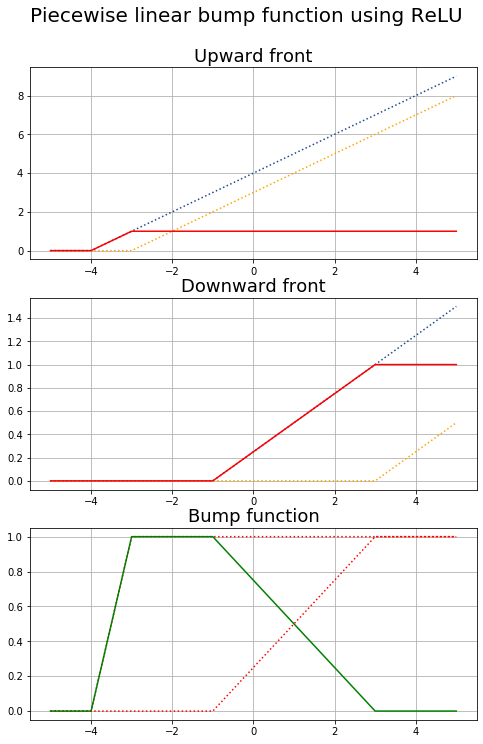

In [3]:
relu = torch.relu

xmin = -5
xmax = 5
k = 20
x = torch.linspace(xmin, xmax, (xmax - xmin)*k + 1).view(-1, 1)

m1 = 1.
s1 = -4.
b1 = -m1*s1
lin1 = b1 + m1*x
y1 = relu(lin1)

m2 = m1
s2 = s1 + 1.
b2 = -m2*s2
t2 = b1 + m1*s2
lin2 = b2 + m2*x
y2 = relu(lin2)

m3 = m1/4
s3 = -1.
b3 = -m3*s3
lin3 = b3 + m3*x
y3 = relu(lin3)

m4 = m3
s4 = (t2 - b3)/m3 # s3 + (t2 - b3)/m3
b4 = -m4*s4
lin4 = b4 + m4*x
y4 = relu(lin4)

step_up = y1 - y2
step_down = y3 - y4

bump = step_up - step_down


# Visualization
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

ax = axs[0]
ax.plot(x, y1, linestyle=':', color='xkcd:cobalt')
ax.plot(x, y2, linestyle=':', color='Orange')
ax.plot(x, step_up, color='Red')
ax.set_title("Upward front", fontsize=18)

ax = axs[1]
ax.plot(x, y3, linestyle=':', color='xkcd:cobalt')
ax.plot(x, y4, linestyle=':', color='Orange')
ax.plot(x, step_down, color='Red')
ax.set_title("Downward front", fontsize=18)

ax = axs[2]
ax.plot(x, step_up, color='Red', linestyle=':')
ax.plot(x, step_down, color='Red', linestyle=':')
ax.plot(x, bump, color='g')
ax.set_title("Bump function", fontsize=18)

for ax in axs:
    ax.grid();
    
fig.suptitle("Piecewise linear bump function using ReLU", fontsize=20, y=.95);